In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**CHECK THE NULL VALUES **

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
gender_count=df['gender'].value_counts()
gender_count

,count
gender,
Male,3555
Female,3488


In [ ]:
churn_count=df['Churn'].value_counts()
churn_count

,count
Churn,
No,5174
Yes,1869


EDA Male and Female are stay

In [ ]:
churn_customer=df[df['Churn']=='Yes']
churned_by_gender = churn_customer.groupby('gender').size().reset_index(name='Total YES Churned')
churned_by_gender

,gender,Total YES Churned
0,Female,939
1,Male,930


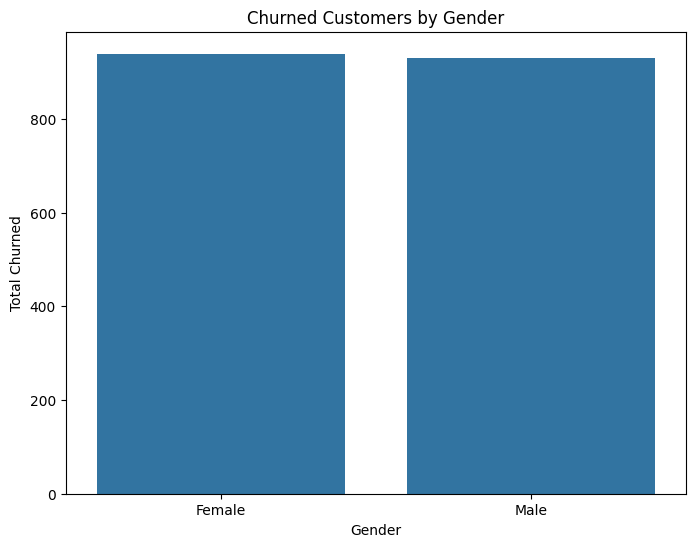

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.barplot(x='gender',y='Total YES Churned', data=churned_by_gender)
plt.title('Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Churned')
plt.show()

In [ ]:
churned_by_partner = churn_customer['Partner'].value_counts()
churned_by_partner

,count
Partner,
No,1200
Yes,669


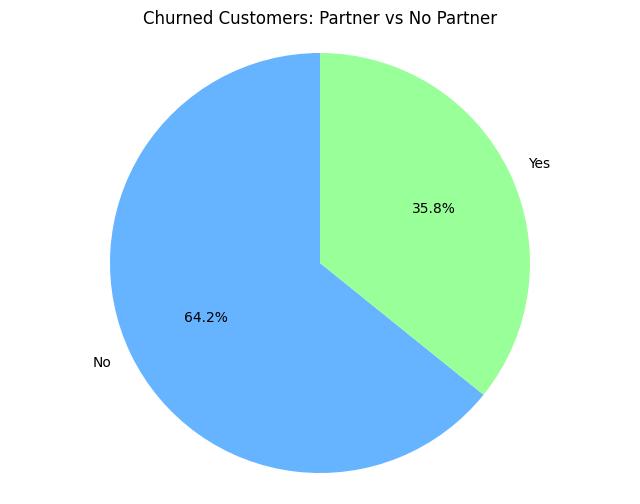

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(churned_by_partner, labels=churned_by_partner.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Churned Customers: Partner vs No Partner')
plt.axis('equal')
plt.show()

In [ ]:
payment_count = churn_customer['PaymentMethod'].value_counts()
payment_count

,count
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


<ipython-input-16-59c32b8a9b85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_count.index,y=payment_count.values,palette='Set2')


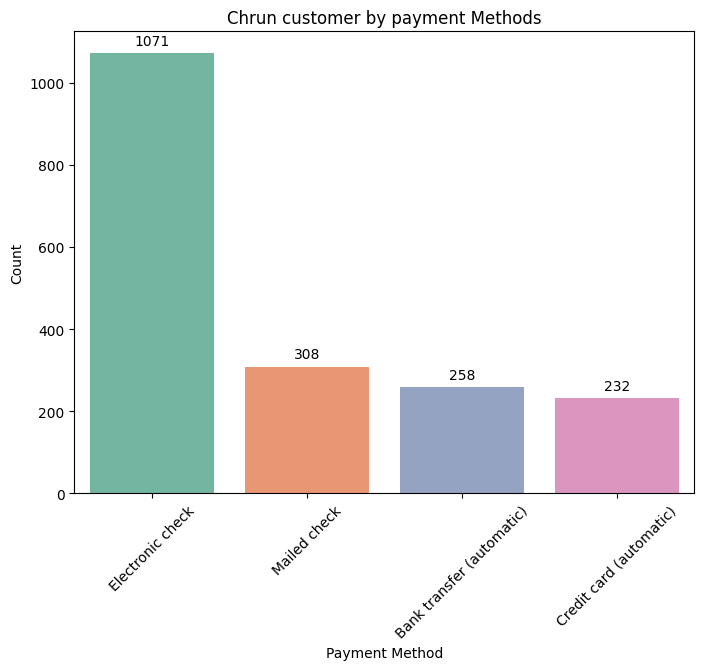

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=payment_count.index,y=payment_count.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Chrun customer by payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
InternetService_count =  churn_customer['InternetService'].value_counts()
InternetService_count


,count
InternetService,
Fiber optic,1297
DSL,459
No,113


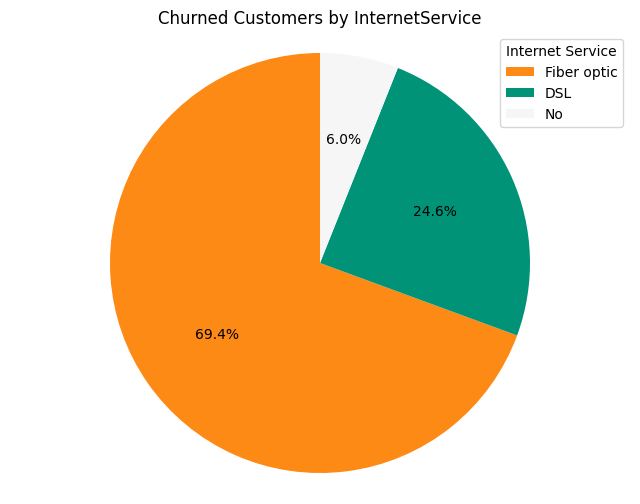

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(InternetService_count, labels=None, autopct='%1.1f%%', colors=['#FC8A15','#009378','#F6F6F6'], startangle=90)
plt.legend(InternetService_count.index, title="Internet Service", loc="best")
plt.title('Churned Customers by InternetService')
plt.axis('equal')
plt.show()

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
non_numeric=x.select_dtypes(exclude=['number']).columns
non_numeric

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [ ]:
x_encoded=pd.get_dummies(x,columns=non_numeric)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)


In [ ]:
logReg=LogisticRegression()
logReg.fit(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=logReg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.9318665720369056


In [ ]:
def predict_customer_churn(customer_data,logReg):
  feature_names=logReg.feature_names_in_

  input_data=pd.DataFrame(0,index=[0],columns=feature_names)

  for feature,value in customer_data.items():
    if feature in feature_names:
      input_data[feature]=value
  churn_prediction=logReg.predict(input_data)[0]

  if churn_prediction==1:
    print('Customer is likely to churn')
  else:
    print('Customer is likely to stay')
print("please enter the customer information")
tenure=int(input("tenure(in months)"))
monthly_charge=float(input('Monthly charges'))
contract_type=input('contract type(0 for month to motnth 1 for annual)')
gender=int(input('gender male/female 0 for female and 1 for male'))
age=int(input('age'))

customer_data={
    'tenure':tenure,
    'MonthlyCharges':monthly_charge,
    'Contract':contract_type,
    'gender':gender,
    'age':age

}
churn_prediction=predict_customer_churn(customer_data,logReg)
print(churn_prediction)


please enter the customer information
tenure(in months)1
Monthly charges2
contract type(0 for month to motnth 1 for annual)4
gender male/female 0 for female and 1 for male4
age4
Customer is likely to stay
None
